In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
team = pd.read_csv('../Data/2017_2018/2017_2018_Boston.csv'); team.index += 1

In [3]:
# iterating the columns 
#for col in tampa.columns: 
#    print(col) 

In [4]:
team = team[ ['Tm', 'Date', 'Opp', 'Result', 'Length', 'G'] ]

In [5]:
# if game went to OT/SO and the team won, then Score -= 1
team.loc[(team.Result == 'W') & pd.notnull(team.Length) , 'G'] = team.G - 1 
team.head()

,Tm,Date,Opp,Result,Length,G
1,BOS,10/5/2017,NSH,3-Apr,W,4.0
2,BOS,10/9/2017,COL,0-4,L,0.0
3,BOS,10/11/2017,COL,6-Mar,L,3.0
4,BOS,10/14/2017,ARI,2-Jun,W,6.0
5,BOS,10/15/2017,VEG,3-Jan,L,1.0


In [6]:
# next up: get team data for 2017-2018
# merge with above table on Opp
# calculate correlation between G and opponent CA%

In [7]:
all_teams = pd.read_csv('../Data/2017_2018/2017_2018_All_teams.csv'); all_teams.index += 1
all_teams = all_teams[ ['Tm', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%'] ]
all_teams.rename(columns={'Tm':'Opp'}, inplace=True)
all_teams

,Opp,CF,CA,CF%,FF,FA,FF%
1,CAR,4487,3727,54.6,3291,2866,53.5
2,CHI,4458,4018,52.6,3125,2994,51.1
3,CGY,4363,3836,53.2,3283,2905,53.1
4,EDM,4253,4104,50.9,3198,3024,51.4
5,CBJ,4239,4009,51.4,3253,2952,52.4
6,TOR,4221,4199,50.1,3108,3250,48.9
7,SJS,4193,4128,50.4,3132,2905,51.9
8,PIT,4180,3825,52.2,3190,2829,53.0
9,VEG,4141,3952,51.2,3076,2940,51.1
10,MTL,4141,4077,50.4,2977,2949,50.2


In [12]:
merged_df = pd.merge(team, all_teams, on='Opp'); merged_df.index +=1
#print(merged_df.to_string())
merged_df = merged_df['Tm', 'G', 'CA', ]
merged_df.head()

,Tm,Date,Opp,Result,Length,G,CF,CA,CF%,FF,FA,FF%
1,BOS,10/5/2017,NSH,3-Apr,W,4.0,4064,3891,51.1,3028,2895,51.1
2,BOS,12/4/2017,NSH,5-Mar,L,3.0,4064,3891,51.1,3028,2895,51.1
3,BOS,10/9/2017,COL,0-4,L,0.0,3693,4102,47.4,2677,3034,46.9
4,BOS,10/11/2017,COL,6-Mar,L,3.0,3693,4102,47.4,2677,3034,46.9
5,BOS,10/14/2017,ARI,2-Jun,W,6.0,4038,4330,48.3,2910,3288,47.0


In [9]:
y_column = merged_df.loc[:,'G']
y_vals = y_column.values

for stat in np.array(['CA', 'FA']):
    x_column = merged_df.loc[:,stat]
    x_vals = x_column.values
    print(np.corrcoef(x_vals, y_vals))

[[1.         0.01838358]
 [0.01838358 1.        ]]
[[1.         0.02448679]
 [0.02448679 1.        ]]


[[1.         0.01838358]
 [0.01838358 1.        ]]


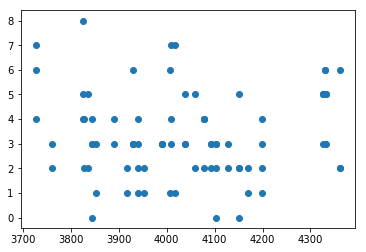

In [10]:
x_column = merged_df.loc[:,'CA']
x_vals = x_column.values

plt.scatter(x_vals, y_vals)
print(np.corrcoef(x_vals, y_vals))

In [11]:
# Tampa CA r = 0.12095596